### <center> Elektrotehnički fakultet </center>
### <center> Univerzitet u Beogradu </center> ###

![alt text](grb.jfif "Title")


## <center> Mašinsko ucenje </center> ##
# <center>Domaći zadatak - Metoda nosećih vektora</center> #


#### <center> Jovana Savic 2020/3423 </center>

## 1 Postavka problema

Datoteka `svmData_ls.txt` sadrži odbirke dve linearno separabilne klase. U prve dve kolone su prediktori a u
poslednjoj odziv. Datoteka `svmData_nls.txt` ima istu strukturu, osim što su u pitanju odbirci klasa koje nisu
linearno separabilne.

- Napišite kod za učenje parametara α SVM-a sa linearnim kernelom bez regularizacije. Možete da koristite gotovu f-ju za numeričku optimizaciju (kvadratno programiranje, SMO itd). Primenite ovaj klasifikator na linearno separabilni skup. Prikažite na istoj slici primere iz obučavajućeg skupa i separacionu pravu. Naznačite pripadnost klasi (npr. različitim bojama). Vidno označite noseće vektore.

- Dopunite kod tako što ćete uvesti gubitak tipa “šarke” (formulacija sa regularizacijom). Ponovo prikažite istu sliku kao u prethodnoj tački. Komentarišite prednosti i nedostatke regularizacije. Kako ste izabrali konstantu C?

- Napišite program za učenje parametara α SVM-a sa regularizacijom i kernelom po sopstvenom izboru. Primenite ovaj program na skup iz datoteke `svmData_nls.txt`. Prikažite isti grafik kao ranije. Komentarišite kako ste izabrali parametre kernela i konstantu regularizacije C.

## 2. Metoda nosećih vektora

U ovom odeljku je izvedena teorija metode nosećh vektora za opšti slučaj sa kernelom i regularizacijom. Izrazi koji se koriste u algoritmu su uokvireni.

### 2.1. Formulacija primalnog problema

Posmatrajmo problem linearne klasifikacije u kome je separaciona prava definisana vektorom $\omega$ i pomerajem $b$. 

Separacionu pravu definišemo kao:

$$ \omega^T x + b = 0$$

i odbirke koji se nalaze iznad ove prave smeštamo u klasu kojoj odgovara $y=1$, a one koji su ispod smeštamo u klasu kojoj odgovara $y=-1$. 

Funkcionalnu marginu $i$-tog odbirka definišemo kao:

$$ \boxed{\hat{\gamma}^{(i)}=y^{(i)}(\omega^Tx+b)} $$

Ova margina će biti pozitivna kada je odbirak dobro klasifikovan. Funkcionalna margina celog obučavajućeg skupa je jednaka minimalnoj funkcionalnoj margini:

$$ \hat{\gamma} = \min_{i =1, \dots, m}\left\{\hat{\gamma}^{(i)}\right\}$$

Geometrijsku marginu $i$-tog odbirka definišemo kao:

$$ \gamma = y^{(i)}\left( \left(\frac{\omega}{|| \omega ||}\right)^Tx^{(i)}+\frac{b}{|| \omega ||} \right) $$

Analogno, geometrijsku marginu celog skupa definišemo kao:

$$ \gamma = \min_{i =1, \dots, m}\left\{ \gamma^{(i)}\right\} $$

Veza između funkcionalne i geometrijske margine je data izrazom:

$$ \gamma = \frac{\hat{\gamma}}{|| \omega ||}$$

Ukoliko je funkcionalna margina veća od nule, tada se ona može proizvoljno povećavati bez ikakve suštinske promene separacione prave. Prema tome, uslov $ \hat{\gamma} > 0 $ je ekvivalentan uslovu $\hat{ \gamma} > C$ gde je $C$ proizvoljan pozitivan realan broj. Zato, maksimizacija geometrijske margine jeste ekvivalentna minimizaciji norme vektora $\omega$ pod uslovom $\hat{\gamma} > C$. Dodatno, pošto je norma vektora pozitivan broj, možemo umesto minimizacijie norme raditi minimizaciju njenog kvadrata. 

Kada za proizvoljnu konstantu izaberemo jedinicu dobijamo sledeći optimizacioni problem:

$$ \min_{\omega, b}\frac{1}{2}|| \omega ||^2 \\ 1 - y^{(i)}(\omega^Tx+b) \leq 0, \forall i $$

Ukoliko podaci nisu linearno separabilni tada možemo da relaksiramo ovaj uslov, odnosno, dozvolimo da funkcionalna margina bude i manja od nule, to jest, veća od nekog -$\xi$, gde je $\xi_i \geq 0$. Kao i malopre, možemo da ubacimo proizvoljnu konstantu umesto nule, konkretno jedinicu. Očigledno, ovakve situacije su nepoželjne jer predstavljaju pogrešno klasifikovane odbirke, pa je potrebno na neki način kazniti algoritam u tim situacijama, odnosno formalizovati to da ovakve situacije treba da se dešavaju što je ređe moguće i da te greške budu što manje. Ovo je jednostavno uraditi dodavanjem tih odstupanja kriterijumskoj funkciji. Na osnovu ovoga možemo da formulišemo primarni problem sa regularizacijom:


$$\min_{\omega, b}\frac{1}{2}|| \omega ||^2 + C \sum_{i=1}^{m} \xi_i \\ y^{(i)}(\omega^Tx+b) \geq1 - \xi_i, \xi_i \geq 0 \forall i$$


### 2.2. Dualni problem

Lagranžijan za dati problem je:

$$ \mathcal{L}(\omega, b, \xi, \alpha, \rho) = \frac{1}{2}||\omega||^2 + C \sum_{i=1}^{m} \xi_i -\sum_{i=1}^{m} \alpha_i \left( y^{(i)} \left( \omega^T x^{(i)} + b \right) - 1 + \xi_i \right) - \sum_{i=1}^{m} \rho_i \xi_i$$

gde su $\alpha_i$ i $\rho_i$ Lagranžeovi multiplikatori, pa je $\alpha \geq 0$ i $\rho \geq 0$.

Za datu funkciju su zadovoljeni uslovi Karush-Kuhn-Tucker teoreme. Kriterijumska funkcija i uslovi su linearne i samim tim konveksne funkcije. Norma vektora je isto konveksna funkcija. Takođe, pošto margina sada može da bude i manja od nule uslovi su sigurno ostvarivi, pa čak i ako klase nisu linearno separabilne. Na osnovu KKT teoreme je:

$$ d^*=\max_{\alpha \geq 0, \rho \geq 0} \min_{\omega, b, \xi} \mathcal{L}(\omega, b, \xi, \alpha, \rho) = \min_{\omega, b, \xi}\max_{\alpha \geq 0, \rho \geq 0}\mathcal{L}(\omega, b, \xi, \alpha, \rho)=p^*$$

Kako su rešenja za primalni i dualni problem ista označićemo ih kao $\omega^*$, $b^*$, $\xi^*$, $\alpha^*$, $\rho^*$.

Tačka u kojoj ovaj uslov važi je sedlasta tačka i u njoj je gradijent jednak nuli:

$$ \triangledown_{\omega} \mathcal{L}(\omega^*, b^*, \xi^*, \alpha^*, \rho^*)=0 , \frac{\partial \mathcal{L}(\omega^*, b^*, \alpha^*)}{\partial b} = 0,  \triangledown_{\xi} \mathcal{L}(\omega^*, b^*, \xi^*, \alpha^*, \rho^*)=0$$

Odatle nalazimo:

$$ \boxed{\omega^* = \sum_{i=1}^{m} \alpha_i y^{(i)} x^{(i)}}$$

$$ \sum_{i=1}^{m} \alpha_i y^{(i)} = 0$$

$$ \alpha_i + \rho_i = C$$

Zamenom dobijenih vrednosti dobijamo dualni problem:

$$ \mathcal{L_D} (\alpha, \rho) = \sum_{i=1}^m \alpha_i - \frac{1}{2}\sum_{i=1}^m \sum_{j=1}^m \alpha_i \alpha_j y^{(i)}y^{(j)}\langle x^{(i)}, x^{(j)} \rangle$$

uz uslove $\alpha \geq 0$, $\rho \geq 0$ i $\alpha_i + \rho_i = C, \forall i$.

Ovi uslovi mogu da se svedu na jedan u kome ne figuriše $\rho$. Takođe, ako uvedemo matricu $Q$ gde je $Q_{i,j} = y^{(i)}y^{(j)} \langle x^{(i)}, x^{(j)} \rangle$ i vektor jedinica $e = [1 1 \dots 1]^T$ dobijamo konačnu formu optimizacionog problema:

$$\max_{\alpha}e^T\alpha - \frac{1}{2} \alpha^TQ\alpha \\
y^T\alpha=0 \\
0 \leq \alpha_i \leq C \\
i = 1, 2, \dots, m$$

Na osnovu KKT teoreme važe i uslovi komplementarne popustljivosti:

$$\boxed{\alpha_i = 0 \Leftrightarrow \hat{\gamma}^{(i)} \geq 1 \\
\alpha_i = C \Leftrightarrow \hat{\gamma}^{(i)} \leq 1 \\
0 <\alpha_i < C \Leftrightarrow \hat{\gamma}^{(i)} = 1}$$

Nakon rešavanja datog optimizacionog problema odluku za odbirak $x$ donosimo na osnovu izraza:

$$ \boxed{\text{sign} (\omega^T x +b) = \text{sign} \left( \sum_{i=1}^{m} y^{(i)} \alpha_i \langle x^{(i)}, x \rangle + b \right)}$$

### 2.3. Rešenje dualnog problema

Funkcija koju maksimizujemo zadovoljava uslove koji su potrebni za primenu gradijentnog uspona. Ovaj algoritam se bazira na tome da funkciju maksimizujemo tako što je maksimizujemo po svakoj komponenti posebno. Ipak, za rešavanje dualnog problema dati algoritam moramo malo da modifikujemo. Naime, zbog uslova $y^T \alpha = 0$ nije moguće menjati samo jedan parametar (to automatski krši dati uslov). Zbog toga funkciju optimizujemo po paru $\alpha_k, \alpha_l$, kao što je dato u pseudokodu ispod, pri tome, drugi parametar linearno zavisi od prvog.

```
   SMO 
    loop until converged:
        select alpha1 and alpha2
        maximize W with respect to alpha_k and alpha_l while holding other alphas fixed
```

#### 2.1.1. Maksimizacija funkcije po izabranom paru 

Prvo ćemo da definišemo vezu između ova dva parametra:

Na osnovu uslova $y^T \alpha = 0$, $\alpha_l$ možemo da pišemo kao:

$$ \alpha_l =  -y^{(l)} \sum_{i=1, i \neq k, l }^{m} \alpha_i y^{(i)} - y^{(k)} y^{(l)} \alpha_k $$

Ili kraće:

$$ \boxed{\alpha_l = \zeta_0 + \zeta_1 \alpha_k}$$

Dalje nalazimo izvod funkcije po vektoru $\alpha$.

$$ \frac {\partial \mathcal{L_D}}{\partial \alpha} = e - Q \alpha $$

Množenjem dobijamo vektor:

$$ \left[ \frac{ \partial \mathcal{L_D}}{\partial \alpha}\right]_i = 1 - y^{(i)} \sum_{j=1}^{m} y^{(j)} \alpha_j \langle x^{(i)}, x^{(j)} \rangle  $$

i iz njega možemo samo da pročitamo izvode koji nam trebaju.

Za maksimizaciju po datom paru je potrebno da izvod po $\alpha_k$ izjednačimo sa nulom. Pre toga je zgodno setiti se sledećeg:

$$ \frac{\text{d}f(x,y)}{\text{d}t}=\frac{\partial f(x,y)}{\partial x}\frac{\text{d}x}{\text{d}t} + \frac{\partial f(x,y)}{\partial y}\frac{\text{d}y}{\text{d}t} $$

Ukoliko je $x=t$ dobijamo:

$$\frac{\text{d}f(x,y)}{\text{d}x}=\frac{\partial f(x,y)}{\partial x} + \frac{\partial f(x,y)}{\partial y}\frac{\text{d}y}{\text{d}x}$$

Na osnovu ovoga nalazimo izvod po $\alpha_k$ kao:

$$ \frac{\partial \mathcal{L_D}}{\partial \alpha_k} = \left( 1 - y^{(k)}\sum_{j=1}^{m} y^{(j)} \alpha_j \langle x^{(k)}, x^{(j)} \rangle \right) + \left( 1 - y^{(l)}\sum_{j=1}^{m} y^{(j)} \alpha_j \langle x^{(l)}, x^{(j)} \rangle \right) \zeta_1$$

Sređivanjem ovog izraza i izjednačavanjem sa nulom dobijamo:

$$ (1+\zeta_1) + y^{(k)} \sum_{j=1}^{m} y^{(j)} \alpha_j \langle x^{(l)} - x^{(k)}, x^{(j)} \rangle = 0$$

Rešenje ove jednačine je optimalna vrednost parametra, i ona može da se napiše kao:

$$ \alpha_k^* = \alpha_k + \Delta \alpha_k$$

gde je $\alpha_k$ stara vrednost. Tada ispred sume možemo da izvučemo traženu promenu:

$$ (1 + \zeta_1) + y^{(k)} \left( y^{(l)} \Delta \alpha_l \langle x^{(l)}-x^{(k)}, x^{(l)} \rangle + y^{(k)} \Delta \alpha_k \langle x^{(l)} - x^{(k)}, x^{(k)} \rangle \right) + y^{(k)} \sum_{j=1}^{m} y^{(j)} \alpha_j \langle x^{(l)} - x^{(k)}, x^{(j)} \rangle = 0$$

Pre nego što rešimo datu jednačinu uvedimo pojam greške na $k$-tom primeru:

$$ \boxed{E^{(k)} = y^{(k)}( \hat{\gamma}^{(k)} - 1) = \omega^T x^{(k)} + b - y^{(k)}}$$

Zamenom vrednosti $\omega$ koju smo dobili izjednačavanjem gradijenta sa nulom možemo da definišemo razliku grešaka na primerima $k$ i $l$:

$$ E^{(l)} - E^{(k)} = \sum_{j=1}^m \alpha_j y^{(j)} \langle x^{(l)} - x^{(k)}, x^{(j)} \rangle - y^{(l)} + y^{(k)}$$

Korišćenjem činjenice da je $\Delta \alpha_l = \zeta_1 \Delta \alpha_k$ i dobijenog izraza za grešku dobijamo:

$$ 1 + \zeta_1 - \Delta \alpha_k || x^{(l)} - x^{(k)} ||^2 + y^{(k)} (E^{(l)} - E^{(k)} + y^{(l)} - y^{(k)}) = 0$$

$$ \Delta \alpha_k = - y^{(k)} \frac{E^{(l)} - E^{(k)}}{\eta}$$

gde je $\eta = - || x^{(l)} - x^{(k)}||^2$.

Nalazimo da je:

$$ \boxed{ \alpha_k^* = \alpha_k - y^{(k)} \frac{E^{(l)} - E^{(k)}}{\eta}}$$.

Ipak, ovo nije konačno rešenje. Treba se setiti da važi uslov $0 \leq \alpha \leq C$. Prema tome, treba da važi:

$$\left\{ 0 \leq\alpha_k \leq C \right\} \wedge \left\{ 0 \leq \zeta_0 +\zeta_1 \alpha_k \leq C\right\}$$

Date uslove možemo kompaktno da zapišemo kao $L \leq \alpha_k \leq H$ gde su $L$ i $H$ definisani kao:

$$L = \begin{cases}
  \max \left\{ 0, -\zeta_0\right\} & \zeta_1 =1\\    
  \max \left\{0, \zeta_0 - C\right\} & \zeta_1 = -1   
\end{cases}$$

$$H = \begin{cases}
  \min \left\{ C - \zeta_0, C\right\} & \zeta_1 =1\\    
  \min \left\{ \zeta_0, C\right\} & \zeta_1 = -1   
\end{cases}$$

Znamo da je $\zeta_0 = \alpha_l - \zeta_1 \alpha_k$ i da je $\alpha^Ty=0$ i na osnovu ovoga dobijamo sledeće izraze za $L$ i $H$ koji se lakše implementiraju:

$$\boxed{L = \begin{cases}
  \max \left\{ 0, \alpha_k - \alpha_l \right\} &  y^{(k)} = y^{(l)}\\    
  \max \left\{0, \alpha_l + \alpha_k - C\right\} & y^{(k)} \neq y^{(l)}  
\end{cases}}$$

$$\boxed{H = \begin{cases}
  \min \left\{ C -\alpha_l + \alpha_k, C\right\} & y^{(k)} = y^{(l)}\\    
  \min \left\{ \alpha_l +\alpha_k, C\right\} & y^{(k)} \neq y^{(l)}  
\end{cases}}$$

Dakle, ukoliko je izračunata optimalna vrednost iznad gornje granice, odnosno ispod dodje granice, ne možemo da je iskoristimo, već da stanemo tu gde je granica. Konačno, na osnovu svega izloženog zaključujemo kako se određuje optimalno $\alpha_k$:

$$\boxed{\alpha_k := \begin{cases}
  H & \alpha_k^* > H\\  
  \alpha_k^* & L \leq \alpha_k^* \leq H \\
  L & \alpha_k^* < L   
\end{cases}}$$

Nakon toga računamo i $\alpha_l$ na osnovu te dobijene vrednosti i veze koja postoji između njih.

#### 2.1.2. Maksimizacija funkcije - detalji implementacije

Gore smo dobili izraz za nalaženje nove vrednosti parametara $\alpha_k$ i $\alpha_l$. 

Prva stvar koju može da bude problematična je situacija u kojoj je $\eta=0$. Ako pogledamo definiciju ove promenljive, jasno je da se radi o slučaju u kome su $x^{(k)}$ i $x^{(l)}$ ista tačka. Zbog toga i dobijeni izraz za nalaženje nove vrednosti u ovoj situaciji nema smisla. Jasno je da ne možemo koristiti par koji predstavlja istu tačku. Prema tome, ukoliko naš algoritam dođe u ovu situaciju to je znak da prosto treba uzeti neki drugi par.

Dalje je potrebno da definišemo novu vrednost parametra $b$. Na osnovu uslova komplementarnosti kada je $0 < \alpha_k < C$ funkcionalna margina za $k$-ti odbirak je jednaka jedinici, što na osnovu definicije greške znači da je greška jednaka nuli. Analogno važi i za $\alpha_l$. Na osnovu ovoga nalazimo da je:

$$ \sum_{j=1}^{m} \alpha_j y^{(j)} \langle x^{(j)}, x^{(k)} \rangle + b - y^{(k)} + \Delta \alpha_k y^{(k)} \langle x^{(k)}, x^{(k)} \rangle + \Delta \alpha_l y^{(l)} \langle x^{(l)}, x^{(k)} \rangle + \Delta b = 0$$

$$ \boxed{b_k = b -E^{(k)} - \Delta \alpha_k y^{(k)} \langle x^{(k)}, x^{(k)} \rangle - \Delta \alpha_l y^{(l)} \langle x^{(l)}, x^{(k)} \rangle} $$

gde je sa $b_k$ označena nova vrednost koju dobijamo na osnovu promene $\alpha_k$.

Analogno, nalazimo i $b_l$:

$$ \boxed{b_l = b -E^{(l)} - \Delta \alpha_l y^{(l)} \langle x^{(l)}, x^{(l)} \rangle - \Delta \alpha_k y^{(k)} \langle x^{(l)}, x^{(k)} \rangle}$$

Oduzimanjem ove dve jednačine nije teško pokazati da će ove dve vrednosti biti iste ako su oba parametra u opsegu $(0, C)$. 

Ukoliko je samo jedan parametar u datom opsegu, pošto uslov komplementarnosti znači da margina nije strogo manja, odnosno, strogo veća od jedinice u graničnim oblastima, ono $b$ za koje je za jedan parametar greška jednaka nuli odgovara i drugom parametru. 

Ukoliko su oba parametra na granici tada bilo koje $b$ iz opsega $b_k$ i $b_l$ zadovoljava uslove KKT teoreme, pa uzimamo ono koje je na polovini.

Odavde nalazimo novu vrednost za $b$:

$$\boxed{b := \begin{cases}
  b_k & 0 < \alpha_k < C\\  
  b_l & 0 < \alpha_l < C \\
  \frac{b_k+b_l}{2}    
\end{cases}}$$

Sada možemo da nađemo i vezu između stare greške i nove za proizvoljan odbirak $x^{(i)}$. 

$$ \boxed{\Delta E^{(k)} = \Delta \alpha_k y^{(k)} \langle x^{(k)}, x^{(i)} \rangle + \Delta \alpha_l y^{(l)} \langle x^{(l)}, x^{(i)} \rangle + b^{\text{new}} - b}$$.


### 2.2. Biranje para za optimizaciju

Maksimizacija funkcije po paru je prilično jasna obzirom da postoji analitičko rešenje koje treba primeniti. Ono odakle potiče kompleksnost ovog algoritma, ali i gde postoji najviše prostora za optimizaciju je način odabiranja ovih parova. 

Na osnovu Osunove teoreme se garantuje konvergencija algoritma dokle god se na svakom koraku funkcija maksimizuje po paru u kome je bar jedan parametar takav da ne ispunjava uslove KKT teoreme. Međutm, u zavisnosti od toga kako biramo parove ovih parametara brzina kojom se izvršava algoritam može znatno da se razlikuje. Ovo je posebno značajno kada je naš skup na kome obučavamo klasifikator jako veliki.

U ovom domaćem zadatku je implementiran algoritam koji je dat u Platt-ovom radu [A Fast Algorithm for Training Support Vector Machines](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/tr-98-14.pdf)

Koristimo dve različite heuristike za biranje prvog parametra i potom drugog. Heuristika za biranje prvog parametra, $\alpha_l$ je sledeća: prolazimo kroz sve odbirke iz trenirajućeg skupa i tražimo one koji ne ispunjavaju usloove KKT teoreme. Ukoliko odbirak ne ispunjava uslove, tada se kreće u optimizaciju gde je on prvi član para. Nakon ovakvog prolaska kroz sve primere primenjujemo drugačiji prolazak. U drugom prolasku, umesto kroz sve primere, prolazimo kroz one za koje vrednost parametra nije na granicama, jer je vrlo verovatno da se oni neće dalje menjati. Potom optimizujemo algoritam prema ovim odbircima dokle god je moguće. Onda kada više ne možemo da optimizujemo ovakve parove ponovo prolazimo kroz ceo trenirajući skup. Ako smo prošli kroz ceo skup podataka, a nismo promenili nijedan parametar algoritam je dostigao maksimum i završava se. 

Drugi član para, $\alpha_k$ biramo tako da maksimizujemo korak koji pravimo pri optimizaciji. Drugi član se bira tako da se maksimizuje $|E^{(k)} - E^{(l)}|$. Ukoliko za ovako izabran drugi parametar algoritam nije u stanju da napravi korak prolazi se kroz skup parametara koji nisu na granici i pravi korak. Ukoliko se desi da i na ovaj način algoritam ne pravi progres, gleda se ceo skup i u njemu nalazi drugi parametar.


### 2.3. Kernel trik

Ukoliko umesto $x$ koristimo $\phi (x)$ možemo da rešavamo problem u višedimenzionom prostoru i da dobijemo granice odluke koje nisu linearne. Vidimo da u svakom izrazu koji koristimo figuriše unutrašnji proizvod vektora $x$, ovaj unutrašnji proizvod možemo da definišemo kao kernel:

$$ K\left( x^{(i)}, x^{(j)} \right) = \langle \phi \left( x^{(i)} \right), \phi \left( x^{(j)} \right) \rangle$$

Prema Merceovoj teoremi validan kernel je onaj kernel za koji je $K(x^{(i)}, x^{(j)}) \geq 0$ $\forall (i,j) \in \left\{ 1, 2, \dots m \right\}$ za svaki skup.

Lepota ovog rešenja je u tome što sada u našem rešenju figuriše isključivo kernel funkcija, to jest, ni ne moramo da znamo koliko je $\phi(x)$, a ona se najčešće mnogo efikasnije računa direktno nego pomoću untrašnjeg proizvoda. Sa druge strane, Merceova teorema nam i kaže šta jeste validan kernel, pa je problem potpuno rešiv bez poznavanja $\phi$.

Kada koristimo kernel trik, $\eta$ definišemo kao:

$$\boxed{\eta = K(x^{(k)}, x^{(l)}) + K(x^{(l)}, x^{(l)}) - 2K(x^{(k)}, x^{(l)})}$$


Kada u prethodno izloženo rešenje ubacimo kernel funkciju umesto unutrašnjih proizvoda dobijamo uopšteni oblik metode nosećih vektora za koji dajemo implementaciju ispod.

## 3. Implementacija algoritma

Dajemo implementaciju koja je urađena na osnovu pseudokoda datog u gore pomenutom radu i na osnovu izvođenja prikazanog iznad. Implementacija je data za opšti slučaj sa kernelom i regularizacijom.

### 3.1. Kernel klasa

In [1]:
import numpy as np

class Kernel:
    def K(self,X,Z):
        pass
    
class LinearKernel(Kernel):
    def __init__(self, bias=0):
        self.bias = bias
        
    def K(self, X, Z):
        return X @ Z.T + self.bias
    
class PolynomialKernel(Kernel):
    def __init__(self, degree, bias=0):
        self.degree = degree
        self.bias = bias
        
    def K(self, X, Z):
        #return np.power(X @ Z.T + self.bias, self.degree)
        ret = np.zeros((X.shape[0], Z.shape[0]))
        for i in range(X.shape[0]):
            for j in range(Z.shape[0]):
                ret[i][j] = (np.inner(X[i,:], Z[j,:]) + self.bias) ** self.degree
        return ret
        
class GaussianKernel(Kernel):
    def __init__(self, sigma):
        self.sigma = sigma
    
    def K(self, X, Z):
        ret = np.zeros((X.shape[0], Z.shape[0]))
        for i in range(X.shape[0]):
            for j in range(Z.shape[0]):
                ret[i][j] = np.exp((- 0.5 * np.inner(X[i,:] - Z[j,:], X[i, :]- Z[j,:])) / (self.sigma ** 2))
        return ret

### 3.2. Klasa koja implementira metodu nosećih vektora

In [2]:
class mySVM:
    def __init__(self, kernel, C, X, y, tol, eps):
        self.kernel = kernel
        self.C = C
        self.X = X
        self.y = y
        self.alpha = None
        self.b = None
        self.m = X.shape[0]
        self.tol = tol
        self.eps = eps
        self.K = None
        
    def predict(self, X_test):
        # If it's not trained return nothing.
        if self.alpha is None:
            return None
        return np.sign(((self.alpha * self.y).T @ self.kernel.K(self.X, X_test) + self.b).T)
    
    
    def computeLH(self, i1, i2):
        if self.y[i1] == self.y[i2]:
            L = max(0, self.alpha[i1] + self.alpha[i2] - self.C)
            H = min(0, self.alpha[i1] + self.alpha[i2])
        else:
            L = max(0, self.alpha[i2] - self.alpha[i1])
            H = min(self.C, self.C + self.alpha[i2] - self.alpha[i1])
            
        return L, H
    
    def takeStep(self, i1, i2):
        if i1 == i2:
            return 0
        
        L, H = self.computeLH(i1, i2)
        if L == H:
            return 0
        
        eta = self.K[i1, i1] + self.K[i2, i2] - 2*self.K[i1, i2]
        
        if abs(eta) <= self.tol:
            return 0
        
        alpha1, alpha2 = self.alpha[i1], self.alpha[i2]
        E1, E2 = self.E[i1], self.E[i2]
        y1, y2 = self.y[i1], self.y[i2]
        
        a2 = alpha2 + y2*(E1-E2)/eta
        if a2 < L:
            a2 = L
        elif a2 > H:
            a2 = H
   
        # Cannot be optimized within given tolerance.
        if abs(a2 - alpha2) < self.eps * (a2 + alpha2 + self.eps):
            return 0
        
        a1 = alpha1 + y1*y2*(alpha2-a2)
        
        # Calculate new b.
        b1 = -E1 - y1 * (a1 - alpha1) * self.K[i1, i1] - y2 * (a2 - alpha2) * self.K[i1, i2] + self.b
        b2 = -E2 - y1 * (a1 - alpha1) * self.K[i1, i2] - y2 * (a2 - alpha2) * self.K[i2, i2] + self.b
        
        if 0 < a1 < self.C:
            b_new = b1
        elif 0 < a2 < self.C:
            b_new = b2
        else:
            b_new = (b1 + b2) / 2
            
        # Update errors
        for i in range(self.m):
            self.E[i] -= -y1*(a1 - alpha1)*self.K[i1, i] - y2*(a2-alpha2)*self.K[i2, i] - b_new + self.b
            
        if 0 < a1 < self.C:
            self.E[i1] = 0
        if 0 < a2 < self.C:
            self.E[i2] = 0
            
        # Update b and alphas
        self.b = b_new
        self.alpha[i1] = a1
        self.alpha[i2] = a2
        
        return 1
            
    
    def examineExample(self, i2):
        
        r2 = self.E[i2] * self.y[i2] 
        if (r2 < -self.tol and self.alpha[i2] < self.C) or (r2 > self.tol and self.alpha[i2] > 0):
            
            # examine alphas that are not in the boundaries
            if len(self.alpha[(self.alpha != 0) & (self.alpha != self.C)]) > 1:
                # use second choice heuristics - maximize abs(E1 - E2)
                if self.E[i2] <+ 0:
                    i1 = np.argmax(self.E)
                else:
                    i1 = np.argmin(self.E)
                
                self.totalIterations += 1
                if self.takeStep(i1, i2):
                    return 1
            
            # Didn't work - Loop over all non-zero and non-C alphas, starting at random.
            for i1 in np.roll(np.where((self.alpha != 0) & (self.alpha != self.C))[0], np.random.randint(0, self.m)):
                self.totalIterations += 1
                if self.takeStep(i1, i2):
                    return 1
                
            # Didn't work again. Loop through all samples
            for i1 in range(self.m):
                self.totalIterations += 1
                if self.takeStep(i1, i2):
                    return 1
                
        return 0
            
    
    def train(self):
        
        self.alpha = np.zeros((self.m, 1))
        self.b = 0
        
        # keep kernel matrx
        self.K = self.kernel.K(self.X, self.X) 
        # error cache
        self.E = (((self.alpha * self.y).T @ self.K + self.b).T) - self.y 
        
        numChanged = 0
        examineAll = True
        
        self.totalNumChanged = 0 # number of actual steps taken
        self.totalIterations = 0 # number of alphas visited
        
        while (numChanged > 0) or examineAll: 
            numChanged = 0              
            if examineAll:
                for i in range(self.m):
                    numChanged += self.examineExample(i)
                    self.totalIterations += 1
            else:
                for i in np.where((self.alpha != 0) & (self.alpha != self.C))[0]:
                    numChanged += self.examineExample(i)
                    self.totalIterations += 1
                    
            self.totalNumChanged += numChanged
            
            if examineAll:
                examineAll = False
            elif numChanged == 0:
                examineAll = True
                
            if self.totalIterations > 200000:
                print("Total number of iterations execeded!")
                break
                
        mask = np.round(self.alpha.reshape((-1,)), decimals=2) != 0.0
        self.support_vectors = self.X[mask[:], :]
        self.support_vectors_y = self.y[mask, :]
        self.omega = (self.y * self.alpha).T @ self.X
        
        

### 3.3. Prikaz podataka i klasifikatora

In [3]:
import matplotlib.pyplot as plt


def plot_data_and_boundary(X, y, svm, linear=False):
    
    colors=('b', 'k', 'r') 
    levels=(-1, 0, 1)
    xrange = np.linspace(X[:,0].min(), X[:,0].max(), 1000)
    yrange = np.linspace(X[:,1].min(), X[:,1].max(), 1000)
    
    # Plot data
    plt.figure(figsize=(12,9))
    plt.scatter(X[:,0], X[:,1],
               c=y, cmap='bwr', lw=0, alpha=0.75)
    
    # If linear plot separation line.
    if linear:
        
        sep_line = lambda x, b, w : -(b + w[0, 0] * x) / w[0, 1]
        y_svm = sep_line(xrange, svm.b, svm.omega)
        plt.plot(xrange, y_svm, '--', label='SVM')
    
    # Plot each class' space.
    xmin, xmax, ymin, ymax = plt.axis()
    xx, yy = np.meshgrid(
        np.linspace(xmin, xmax, num=100, endpoint=True), 
        np.linspace(ymin, ymax, num=100, endpoint=True))
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.1, cmap='bwr')
    
    
    # Plot support vectors (non-zero alphas)
    # as circled points (linewidth > 0)
    plt.scatter(svm.support_vectors[:,0], svm.support_vectors[:,1],
               c=svm.support_vectors_y, cmap='bwr', lw=3, edgecolors='k')

### 3.4. Učitavanje i standardizacija podataka

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def read_standardize_split_data(file_path, num_of_variables):
    
    header_list = []
    for i in range(num_of_variables):
        header_list.append('x'+str(i))
    header_list.append('y')
    
    features = header_list[0:num_of_variables]
    
    _data = pd.read_csv(file_path, header=None, names=header_list, sep='\t', lineterminator='\r') 
    
    X = _data[features]
    y = _data['y']
    
    X = (X.to_numpy())
    y = (y.to_numpy())
    y = y.reshape(-1, 1)
    
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)
    
    # scaler = StandardScaler().fit(X_train)
    # X_train = scaler.transform(X_train)
    # X_test = scaler.transform(X_test)
    # X = scaler.transform(X_train)
    
    # return X, X_train, X_test, y, y_train, y_test
    
    scaler = StandardScaler().fit(X)
    X = scaler.transform(X)
    
    
    return X, y

## 4. Linearni kernel bez regularizacije

U ovom odeljku posmatramo šta se dešava kada ne postoji regularizacija, koristimo linearni kernel i imamo linearno separabilne podatke. 

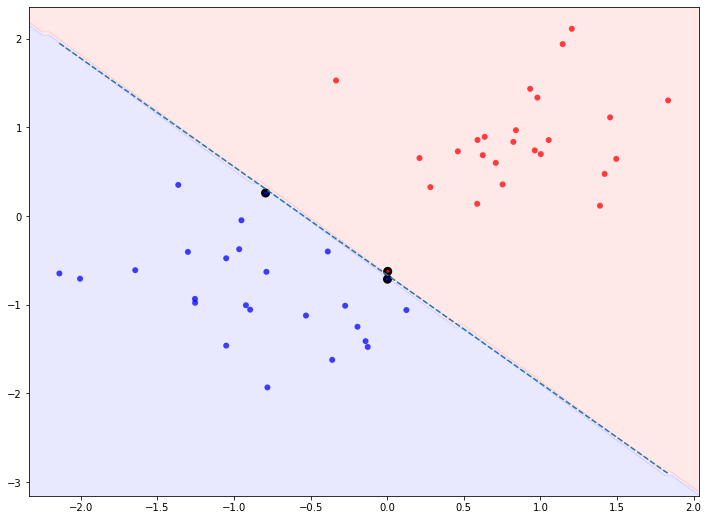

In [5]:
X, y = read_standardize_split_data("svmData_ls.txt", 2)
svm = mySVM(kernel=LinearKernel(), C=float("inf"), X = X, y=y, tol=0.001, eps=0.001)

svm.train()
plot_data_and_boundary(X, y, svm, linear=True)

Na slici iznad vidimo rezultate klasifikacije. Noseći vektori su uokvireni crnom bojom. Odgovarajućim bojama su označene oblasti svake klase. Podaci su linearno separabilni i zato uspevamo da pronađemo separacionu pravu koja ne pravi grešku ni na jednom primeru. Možemo da pogledamo koliko koraka i iteracija je bilo potrebno algoritmu da pronađe rešenje.

In [6]:
svm.totalNumChanged

32

In [7]:
svm.totalIterations

382

Za 50 odbiraka imamo 1225 različitih kombinacija parova. Vidimo da su heuristike koje su uvedene dovele do toga da proverom oko trećine ovih kombinacija dostignemo konačno rešenje. Pri tome, imamo samo 34 promene para parametara (što je i najskuplja operacija). 

In [8]:
mask = np.round(svm.alpha.reshape((-1,)), decimals=2) != 0.0
svm.alpha[mask]

array([[584.39466285],
       [ 33.00622716],
       [617.40089001]])

## 5. Linearni kernel sa regularizacijom

U ovom odeljku posmatramo šta se dešava kada na prethodne podatke primenimo metodu nosećih vektora sa regularizacijom.

Posmatrajmo primer u kome je konstanta regularizacije premala.

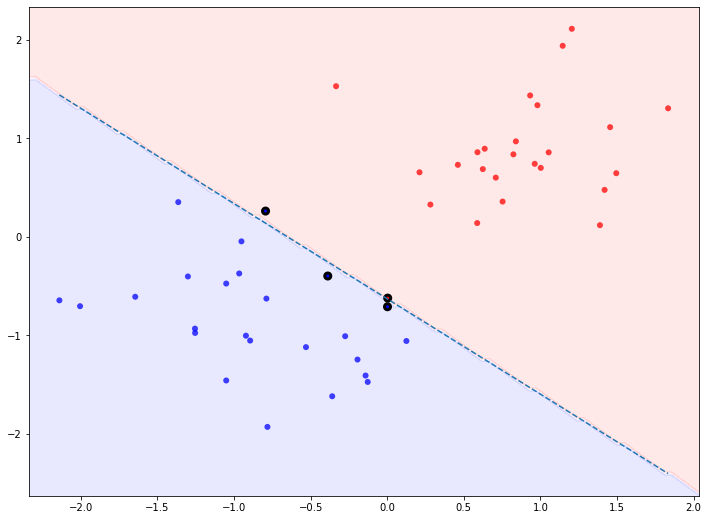

In [9]:
svm = mySVM(kernel=LinearKernel(), C=300, X = X, y=y, tol=0.001, eps=0.001)

svm.train()
plot_data_and_boundary(X, y, svm, linear=True)

In [10]:
mask = np.round(svm.alpha.reshape((-1,)), decimals=2) != 0.0
print(svm.X[mask,:])
print(svm.alpha[mask,:])

[[-0.38823583 -0.39982458]
 [ 0.00167893 -0.71183757]
 [-0.79457677  0.25975418]
 [ 0.00307998 -0.62387124]]
[[  5.70887831]
 [282.10269424]
 [ 12.18842745]
 [300.        ]]


Vidimo da je algoritam iskoristio datu slobodu i napravio jednu grešku. Ovo se dešava jer su optimalne vrednosti veće od konstante regularizacije (što smo videli u primeru bez regularizacije). Korišćenje regularizacije onda kada je klase moguće poptuno odvojiti može da dovede do na prvi pogled lošijeg klasifikatora. Ipak, naš klasifikator se ponaša kao da je ovaj jedan netačno klasifikovan odbirak izuzetak i to može da bude vrlo razumna pretpostavka (koju bismo proverili na nekom validacionom skupu).  

Dole je prikazan rezultat klasifikacije kada povećamo konstantu regularizacije.



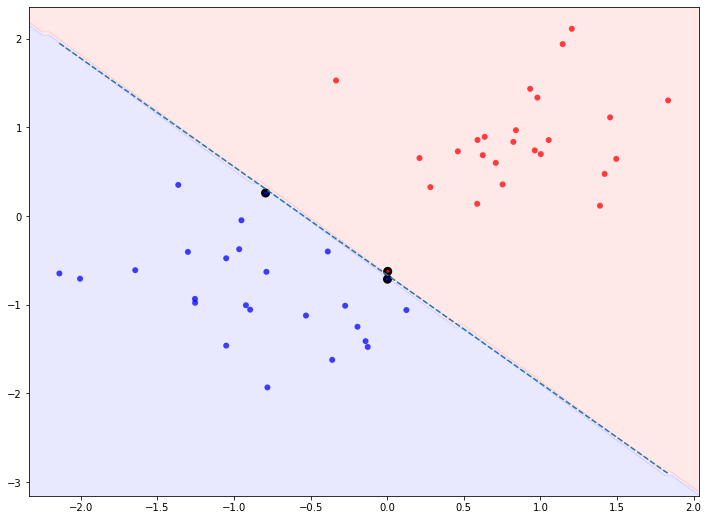

In [11]:
svm = mySVM(kernel=LinearKernel(), C=1000, X = X, y=y, tol=0.001, eps=0.001)

svm.train()
plot_data_and_boundary(X, y, svm, linear=True)

U ovom primeru su vektori dvodimenzioni, pa je moguće grafički prikazati rezultate i na osnovu toga podešavati konstantu regularizacije. U opštem slučaju to ne mora da važi. Tada bi ona mogla da se odredi unakrsnom validacijom. 

Iako velika konstanta regularizacije omogućava klasifikaciju bez greške, nije nerazumno pretpostaviti da odbirak koji smo pogrešno klasifikovali predstavlja odbirak koji odstupa od ostalih. Ako bismo ga tako shvatili, tada rešenje sa malom konstantom regularizacije može zapravo da bude bolja opcija. Ovo bi se najlakše proverilo na nekom validacionom skupu. Ovde, nažalost, radimo sa jako malim brojem podataka, pa nije baš očigledno kako treba shvatiti ovaj primer.

## 6. Podaci koji nisu linearno separabilni

U ovom odeljku posmatramo šta se dešava kada imamo podatke koji nisu linearno separabilni.

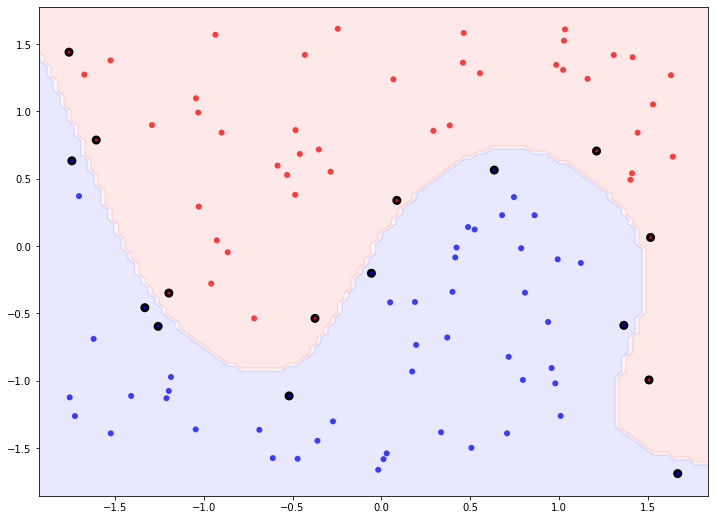

In [12]:
X, y = read_standardize_split_data("svmData_nls.txt", 2)
svm = mySVM(kernel=GaussianKernel(sigma=1), C=float('inf'), X = X, y=y, tol=0.0001, eps=0.001)

svm.train()
plot_data_and_boundary(X, y, svm, linear=False)

Vidimo da Gausov kernel bez regularizacije daje odlične rezultate. Nijedan odbirak nije pogrešno klasifikovan, a dobijena granica izgleda onako kako bi većina ljudi nacrtala.

In [13]:
svm.totalNumChanged

1592

In [14]:
svm.totalIterations

94060

Bilo je pokušaja da se koristi polinomijalni kernel različitog stepena, ali rezultati su jako loši. Polinomijalni kerneli generišu granice odluke koje su oblika hiperbola, i to uopšte ne odgovara podacima.

## 7. Zaključak

Implementirani algoritam i metoda nosećih vektora se sjajno pokazuju na linearno separabilnim podacima. Ideja iza metode nosećih vektora je geometrijska za razliku od logističke regresije koja je statistička. Algoritam opisan u Platt-ovom radu je jako brz čak i kada se implementira u Python-u, a opet je prilično jednostavan. Videli smo i da je broj koraka dosta manji od broja parova koji se razmatraju. 

Kernel trik nam daje veoma jednostavan način da klasifikujemo podatke i onda kada granice nisu linearne. Na osnovu izraza za odluku vidimo da je dovoljno čuvati samo noseće vektore i njihove parametre za donošenje nove odluke. Ovo je uglavnom dobro jer je broj nosećih vektora jako mali. Ipak, to ne mora uvek biti slučaj, pogotovo ako su podaci višedimenzioni, i tada predviđanje izlaza može da bude jako numerički zahtevno.

Ono što je velika mana ovog algoritma je jako teško određivanje parametra regularizacije i kernela. Kada ovaj parametar ili kernel nisu izabrani kako treba algoritam jako sporo konvergira. Ovo je u implementaciji rešeno tako što se algoritam prekida kada broj iteracija postane preveliki. 
